In [1]:
import json
with open('keys.json') as f:
    keys = json.load(f)
    

app_id = keys['reddit']['app_id']
app_secret = keys['reddit']['app_secret']
username = keys['reddit']['username']
password = keys['reddit']['password']

In [2]:
import requests
from bs4 import BeautifulSoup

course_names = []

for i in range(1,6):
    url = f'https://www.lse.ac.uk/programmes/search-courses?pageIndex={i}&studyType=0%2F1%2F26%2F85%2F86'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')

    cards = soup.find_all('div', class_='card__content')

    for card in cards:
        a_tag = card.find('h2', class_='card__title').find('a')
        if a_tag and a_tag.text:  
            course_names.append(a_tag.text.strip())

course_names

['Undergraduate BSc Geography with Economics',
 'Undergraduate BSc Philosophy, Logic and Scientific Method',
 'Undergraduate BSc Psychological and Behavioural Science',
 'Undergraduate BSc Politics and International Relations',
 'Undergraduate LLB Bachelor of Laws',
 'Undergraduate BSc International Social and Public Policy with Economics',
 'Undergraduate BSc Mathematics with Data Science',
 'Undergraduate BSc Politics and Philosophy',
 'Undergraduate BSc Politics',
 'Undergraduate BSc Economics and Economic History',
 'Undergraduate BSc Economics and Economic History',
 'Undergraduate BSc Sociology',
 'Undergraduate BA History',
 'Undergraduate BSc Mathematics, Statistics and Business',
 'Undergraduate BSc Management',
 'Undergraduate BSc Mathematics with Economics',
 'Undergraduate BSc International Relations',
 'Undergraduate BA Anthropology and Law',
 'Undergraduate BSc Data Science',
 'Undergraduate BSc Economic History and Geography',
 'Undergraduate BSc Mathematics and Economic

In [3]:
words = []
for course in course_names:
    words.append(course.split())

keywords = []
for word in words:
    for i in range(len(word)):
        keywords.append(word[i])
        
unique_keywords = list(set(keywords))
unique_keywords

['Social',
 'BSc',
 'Statistics',
 'Geography',
 'Logic',
 'Culture',
 'Behavioural',
 'Psychological',
 'Society',
 'Anthropology',
 'with',
 'Bachelor',
 'Public',
 'International',
 'Development',
 'and',
 'Law',
 'Mathematics',
 'Business',
 'Chinese',
 'Economic',
 'Accounting',
 'Undergraduate',
 'Economics',
 'Philosophy,',
 'Politics',
 'Mathematics,',
 'Scientific',
 'History',
 'Econometrics',
 'Mathematical',
 'Sociology',
 'Laws',
 'Science',
 'Management',
 'Financial',
 'LLB',
 'Actuarial',
 'Philosophy',
 'Language,',
 'Method',
 'Relations',
 'of',
 'Policy',
 'Data',
 'Environment',
 'Sustainable',
 'Finance',
 'BA']

In [4]:
import praw
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [5]:
!python -m spacy download en_core_web_md


     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.4/42.8 MB 12.2 MB/s eta 0:00:04
      --------------------------------------- 0.9/42.8 MB 13.5 MB/s eta 0:00:04
     - -------------------------------------- 1.3/42.8 MB 12.1 MB/s eta 0:00:04
     - -------------------------------------- 1.8/42.8 MB 11.4 MB/s eta 0:00:04
     -- ------------------------------------- 2.1/42.8 MB 11.3 MB/s eta 0:00:04
     -- ------------------------------------- 2.7/42.8 MB 10.6 MB/s eta 0:00:04
     -- ------------------------------------- 3.2/42.8 MB 10.8 MB/s eta 0:00:04
     --- ------------------------------------ 3.8/42.8 MB 11.0 MB/s eta 0:00:04
     ---- ----------------------------------- 4.5/42.8 MB 11.9 MB/s eta 0:00:04
     ---- ----------------------------------- 4.6/42.8 MB 11.8 MB/s eta 0:00:04
     ---- ----------------------------------- 4.6/42.8 MB 11.8 MB/s eta 0:00:04
     ---- ----------------------------------- 5.

In [6]:
reddit = praw.Reddit(client_id = app_id,
                    client_secret = app_secret,
                    user_agent = "ChangeMeClient/0.1 by YourUsername",
                    username = username,
                    password = password)

In [7]:
unique_keywords
data = []

for submissions in reddit.subreddit("6thForm+TheLse").search("LSE", limit=2000,sort="new"):  
    if any(keyword in submissions.title for keyword in unique_keywords):
        if submissions.num_comments > 0:
            comments = submissions.comments.replace_more(limit=0)            
            for comment in submissions.comments.list():
                data.append([submissions.title,
                             submissions.author,
                             submissions.num_comments,
                             comment.author,
                             comment.body])

df = pd.DataFrame(data, columns=['title','author','num_comments','comment_author','comment_text'])


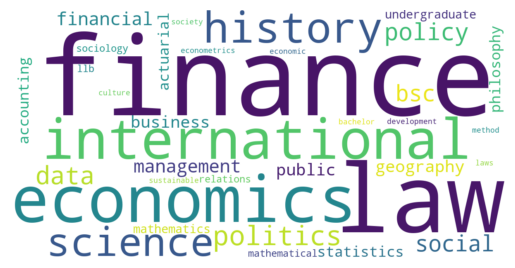

In [8]:
filtered_df = df.loc[df['comment_author'] != 'AutoModerator']

nlp = spacy.load("en_core_web_md")
words = '\n'.join(filtered_df.comment_text)
text = nlp(words)

new_text = ""
for word in text:    
    if word.pos_ in ['ADJ','NOUN','PROPN']:
        new_text = " ".join((new_text, word.text.lower()))
        
words_in_text = new_text.split()
filtered_unique_keywords = []
for word in unique_keywords:
    filtered_unique_keywords.append(word.lower())

filtered_words = [word for word in words_in_text if word in filtered_unique_keywords]


word_frequencies = Counter(filtered_words)

wordcloud = WordCloud(background_color='white', width=1200, height=600).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
datas = []
for submissions in reddit.subreddit("UniUK").search("LSE", limit=100,sort="new"):  
     if submissions.num_comments > 0:
        comments = submissions.comments.replace_more(limit=0)            
        for comment in submissions.comments.list():
            datas.append([submissions.title,
                         submissions.author,
                         submissions.num_comments,
                         comment.author,
                         comment.body])

new_df = pd.DataFrame(datas, columns=['title','author','num_comments','comment_author','comment_text'])


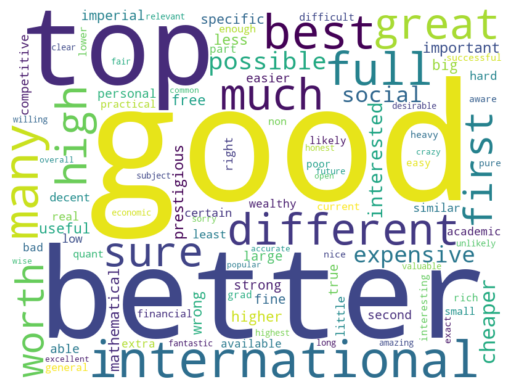

In [10]:
filtered_new_df = new_df.loc[new_df['comment_author'] != 'AutoModerator']

nlp = spacy.load("en_core_web_md")
words = '\n'.join(filtered_new_df.comment_text)
text = nlp(words)

new__text = ""
for word in text:    
    if word.pos_ in ['ADJ']:
        new__text = " ".join((new__text, word.text.lower()))


custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['offer','reddit','message','compose','bot','action','moderators','lol','subreddit','6thform',
                         'course','questions','ucl','concerns','kcl','people','uni'])
wordcloud = WordCloud(stopwords=custom_stopwords, max_words=100, background_color='white', width=800, height=600).generate(new__text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()